# Demo: Reading Data From City of Rochester
data/BikeRochester was an export of data from City of Rochester that should match data found in their [bike map here](https://maps.cityofrochester.gov/portal/apps/webappviewer/index.html?id=c43beb5e7cbb456eae74822dfcf98db4).

In [41]:
import geopandas as gpd
import fiona
import folium
import osmnx as ox

In [42]:
import os
os.chdir('../')

In [43]:
from roc_bike_growth.plotting import add_categorical_legend

In [38]:
# Trails appears to be off-street bike network
trails = gpd.read_file('data/BikeRochester/Trails.shp', crs='EPSG:32633')

<AxesSubplot:>

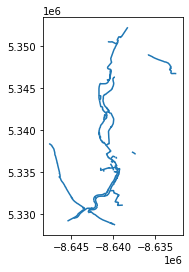

In [4]:
trails.plot()

In [32]:
# Bike lanes appear to be on-street bike network
bike_lanes = gpd.read_file('data/BikeRochester/Bike Markings.shp', crs='EPSG:32633')

In [33]:
bike_lanes.groupby('Type')['Length_Mi'].sum()

Type
Bike Blvd       8.32
Bike Lanes     53.49
Cycle Track     1.71
Shared Use     27.84
Name: Length_Mi, dtype: float64

<AxesSubplot:>

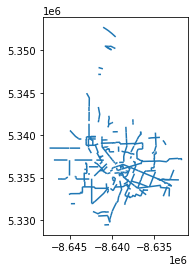

In [34]:
bike_lanes.plot()

## Interactive Map

In [58]:
colors = {
    'Bike Lanes': '#0e79ca', #  this == "bike lanes" bike lanes
    'Cycle Track': '#c469d8', # cycle track
    'Bike Blvd': '#fcbc2d', # bike blvd -- this == "trails"
    'Trail': '#28cf08', # trail == "shared use / bike blvd"
    'Shared Use': '#fd2000'
}

m = folium.Map(location=[43.15, -77.6750], tiles="Stamen Toner", zoom_start=13)
for name, gdf in bike_lanes.to_crs('EPSG:4326').groupby('Type'):
    layer = folium.FeatureGroup(name=name,show=True)
    ox.folium._plot_folium(
    gdf,
    layer, 
    popup_attribute=None, 
    tiles=None,
    zoom=None,
    fit_bounds = True,
     **{'color': colors[name]})
    layer.add_to(m)
    

layer = folium.FeatureGroup(name='Trail',show=True)
ox.folium._plot_folium(
    trails.to_crs('EPSG:4326').explode(),
    layer, 
    popup_attribute=None, 
    tiles=None,
    zoom=None,
    fit_bounds = True,
     **{'color': colors['Trail']})
layer.add_to(m)

add_categorical_legend(m, 'Infra type', colors.values(), colors.keys())
folium.LayerControl(position='bottomright').add_to(m)

/tmp/ipykernel_216/2981335293.py:25: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  trails.to_crs('EPSG:4326').explode(),


In [59]:
m

In [ ]:
m.save('ROC_map.html')